In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set visualization styles
sns.set(style="whitegrid")

In [3]:
# Read in the data
schools = pd.read_csv("schools.csv")

In [4]:
# Preview the dataset
print("Dataset Preview:")
schools.head()

Dataset Preview:


,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN
1,Essex Street Academy,Manhattan,M445,395,411,387,78.9
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7


## SECTION 1: NYC Schools with Best Math Results

In [6]:
print("\nBest Performing Schools in Math (>= 80% of 800):")
best_math_schools = schools[schools['average_math'] >= 0.8 * 800]
best_math_schools = best_math_schools.sort_values('average_math', ascending=False)
best_math_results = best_math_schools[['school_name', 'average_math']]
best_math_results.head(10)


Best Performing Schools in Math (>= 80% of 800):


,school_name,average_math
88,Stuyvesant High School,754
170,Bronx High School of Science,714
93,Staten Island Technical High School,711
365,Queens High School for the Sciences at York Co...,701
68,"High School for Mathematics, Science, and Engi...",683
280,Brooklyn Technical High School,682
333,Townsend Harris High School,680
174,High School of American Studies at Lehman College,669
0,"New Explorations into Science, Technology and ...",657
45,Eleanor Roosevelt High School,641


## Visualization: Top 10 Math Scores

/var/folders/17/y6yqqy7n54j29b_bxf1w8h880000gn/T/ipykernel_69892/1463068675.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=best_math_results.head(10), x='average_math', y='school_name', palette="coolwarm")


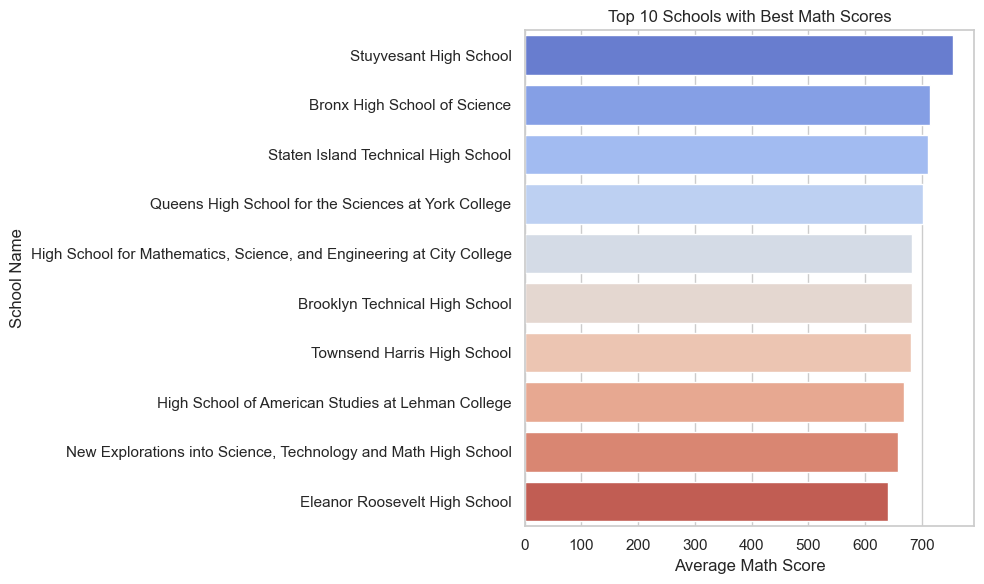

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(data=best_math_results.head(10), x='average_math', y='school_name', palette="coolwarm")
plt.title("Top 10 Schools with Best Math Scores")
plt.xlabel("Average Math Score")
plt.ylabel("School Name")
plt.tight_layout()
plt.savefig("top_math_scores.png")
plt.show()

## SECTION 2: Top 10 Schools Based on Combined SAT Scores

In [10]:
schools['total_SAT'] = schools['average_math'] + schools['average_reading'] + schools['average_writing']
top_10_schools = schools.sort_values('total_SAT', ascending=False).head(10)
print("\nTop 10 Schools by Combined SAT Scores:")
top_10_schools[['school_name', 'total_SAT']]


Top 10 Schools by Combined SAT Scores:


,school_name,total_SAT
88,Stuyvesant High School,2144
170,Bronx High School of Science,2041
93,Staten Island Technical High School,2041
174,High School of American Studies at Lehman College,2013
333,Townsend Harris High School,1981
365,Queens High School for the Sciences at York Co...,1947
5,Bard High School Early College,1914
280,Brooklyn Technical High School,1896
45,Eleanor Roosevelt High School,1889
68,"High School for Mathematics, Science, and Engi...",1889


## Visualization: Top 10 Combined SAT Scores

/var/folders/17/y6yqqy7n54j29b_bxf1w8h880000gn/T/ipykernel_69892/999765075.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_schools, x='total_SAT', y='school_name', palette="viridis")


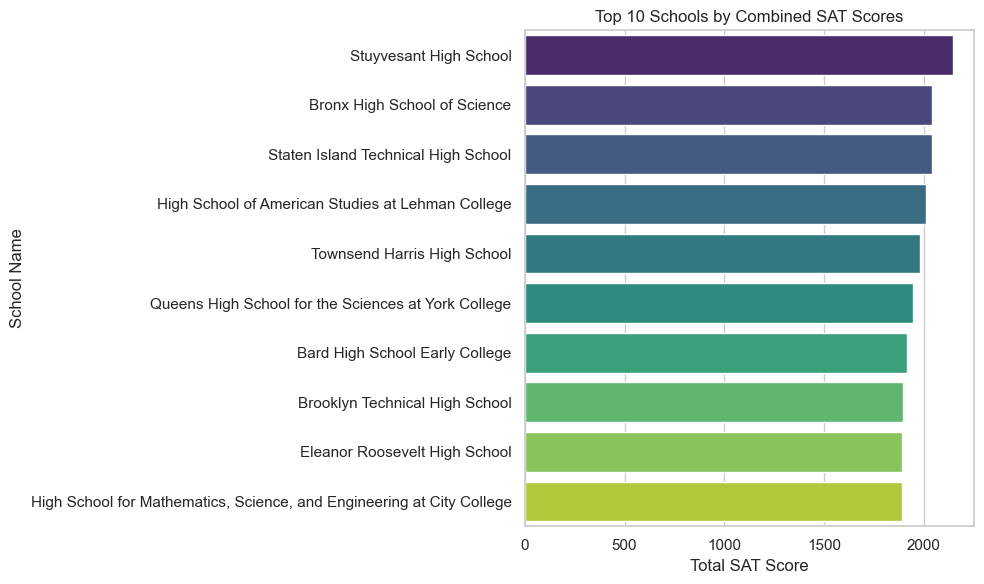

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_schools, x='total_SAT', y='school_name', palette="viridis")
plt.title("Top 10 Schools by Combined SAT Scores")
plt.xlabel("Total SAT Score")
plt.ylabel("School Name")
plt.tight_layout()
plt.savefig("top_combined_scores.png")
plt.show()

## SECTION 3: Borough with the Largest SAT Score Standard Deviation

In [13]:
borough_stats = schools.groupby('borough')['total_SAT'].agg(['count', 'mean', 'std']).round(2)
largest_std_borough = borough_stats.loc[borough_stats['std'].idxmax()]
print("\nBorough with Largest Standard Deviation in SAT Scores:")
largest_std_borough


Borough with Largest Standard Deviation in SAT Scores:


count      89.00
mean     1340.13
std       230.29
Name: Manhattan, dtype: float64

## Visualization: Borough SAT Statistics

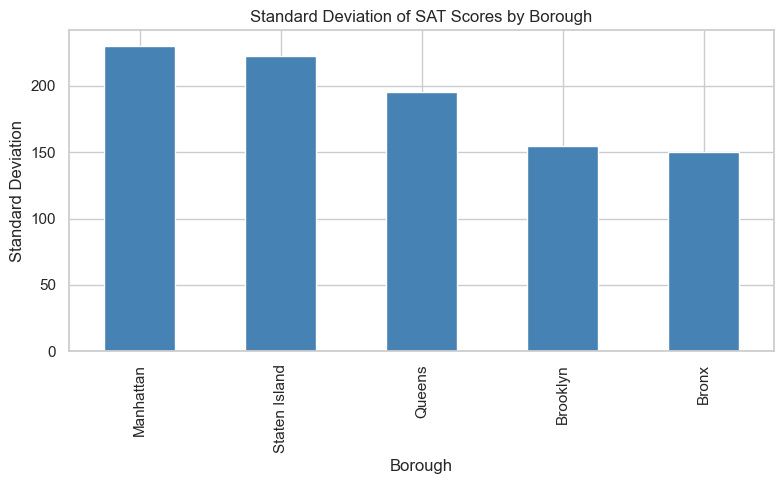

In [14]:
plt.figure(figsize=(8, 5))
borough_stats.sort_values('std', ascending=False)['std'].plot(kind='bar', color='steelblue')
plt.title("Standard Deviation of SAT Scores by Borough")
plt.xlabel("Borough")
plt.ylabel("Standard Deviation")
plt.tight_layout()
plt.savefig("borough_sat_std.png")
plt.show()

## Average Math Score per Borough

In [17]:
avg_math_borough = schools.groupby('borough')['average_math'].mean().round(2)
print("\nAverage Math Scores by Borough:")
avg_math_borough


Average Math Scores by Borough:


borough
Bronx            404.36
Brooklyn         416.40
Manhattan        455.89
Queens           462.36
Staten Island    486.20
Name: average_math, dtype: float64

## Visualization: Average Math Scores by Borough

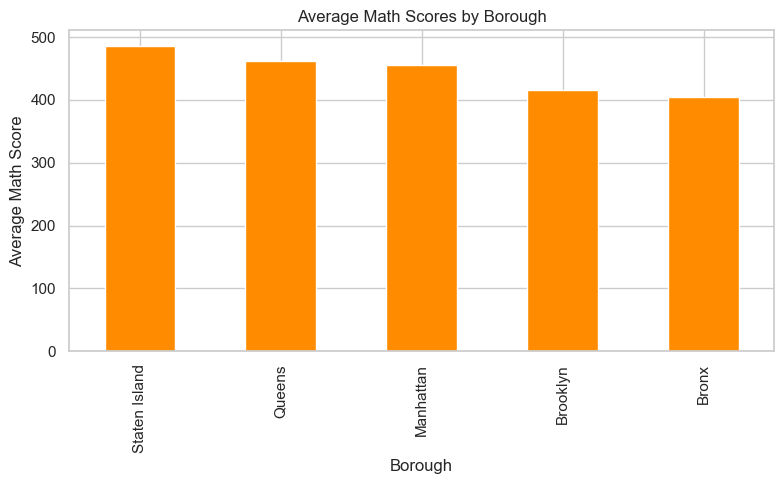

In [18]:
plt.figure(figsize=(8, 5))
avg_math_borough.sort_values(ascending=False).plot(kind='bar', color='darkorange')
plt.title("Average Math Scores by Borough")
plt.xlabel("Borough")
plt.ylabel("Average Math Score")
plt.tight_layout()
plt.savefig("avg_math_borough.png")
plt.show()

## Schools with Above Average Total SAT Scores

In [20]:
overall_avg_sat = schools['total_SAT'].mean()
above_avg_schools = schools[schools['total_SAT'] > overall_avg_sat]
print("\nSchools with Above Average SAT Scores:")
above_avg_schools[['school_name', 'total_SAT']].head(10)


Schools with Above Average SAT Scores:


,school_name,total_SAT
0,"New Explorations into Science, Technology and ...",1859
3,High School for Dual Language and Asian Studies,1529
5,Bard High School Early College,1914
10,Pace High School,1292
11,High School for Health Professions and Human S...,1327
12,High School for Language and Diplomacy,1290
14,Institute for Collaborative Education,1592
15,Gramercy Arts High School,1360
16,Urban Assembly New York Harbor School,1327
18,Millennium High School,1704


## Correlation Between SAT Sections

In [22]:
correlations = schools[['average_math', 'average_reading', 'average_writing']].corr()
print("\nCorrelation Between SAT Sections:")
correlations


Correlation Between SAT Sections:


,average_math,average_reading,average_writing
average_math,1.000000,0.928239,0.934155
average_reading,0.928239,1.000000,0.985439
average_writing,0.934155,0.985439,1.000000


## Visualization: Heatmap of SAT Section Correlations

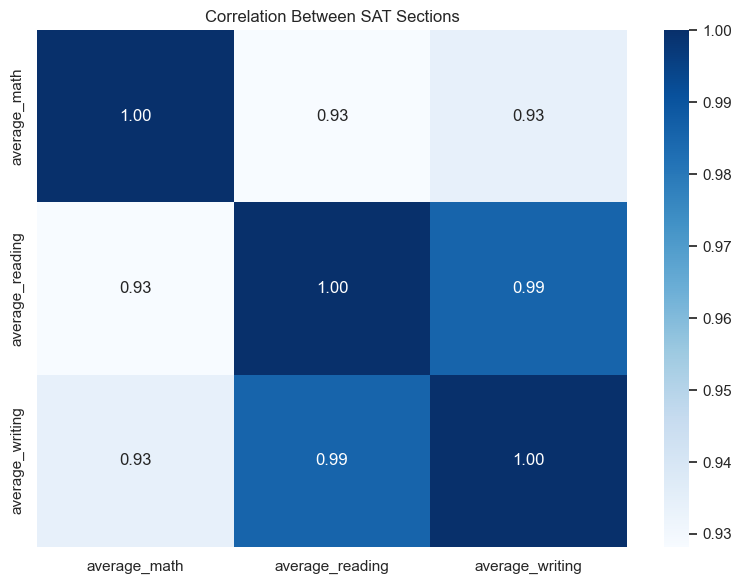

In [23]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Between SAT Sections")
plt.tight_layout()
plt.savefig("sat_correlation.png")
plt.show()